### Vision and Imagine Processing Assignment 2

Tibor Krols, Marie Mortensen, Rachel Rea, Ninell Oldenburg

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 12]
from skimage.data import camera
from skimage.filters import gaussian
#from skimage.filters.rank import mean
from skimage.io import imread
from skimage import img_as_float
import cv2
#from skimage.feature import canny
#from skimage.util import random_noise
#from skimage.morphology import disk
#from scipy.signal import correlate2d
from scipy.ndimage import gaussian_filter, gaussian_gradient_magnitude
#from scalespace import gaussian_scalespace, structure_tensor, determinant_symmetric_field, trace_symmetric_field

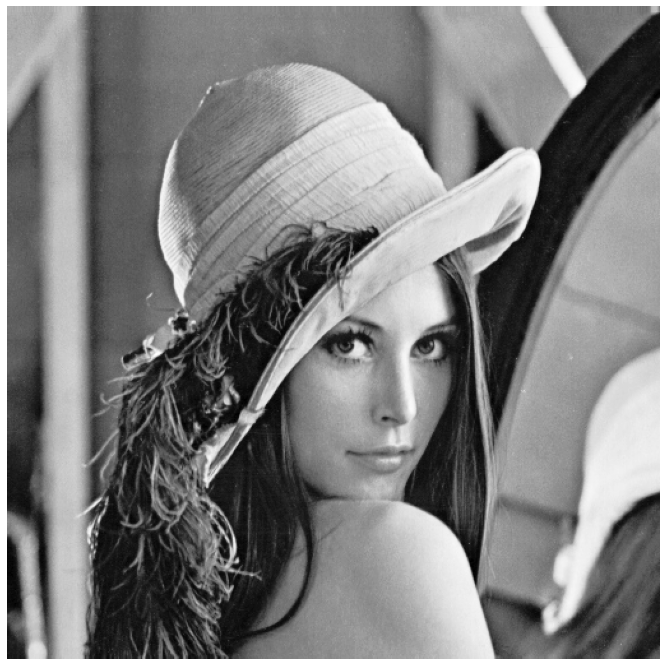

In [2]:
l = np.array(imread("lenna.jpg"))
l = img_as_float(l)
plt.imshow(l, cmap='Greys_r')
plt.gcf()
plt.axis('off')
plt.show()

# Gaussian Filtering

## First DIY attempt

First, we tried to create a Gaussian function and a convolution ourselves. Therefore, we started creating a gaussian
distributed matrix with the `random.normal` package. The convolution takes the image and the matrix as input and
convolutes (multiplies and adds) the image values by the matrix values to a new image.

We can see, that depending on the size of the kernel, the image gets more and more "layers". It looks like more and more thin layers of the pictures overlap. That makes sense: the bigger kernel is, the more values are the input of the
resulting value in the new picture. Secondly, of course the edge gets larger as bigger the kernel gets. This is due to 
our poor implementation of edge cutting.

Furthermore, we tried varying the sigma value, so the variance of the gaussian function. The larger the sigma (and closer to the size of the kernel), the more uniform the gaussian values get. That means, that also all the values that are being convulted with that kernel are getting more uniform. Something that we can see clearly in the pictures below. Where sigma = 1 still preserves most of the color differences, the larger sigma gets, the less color difference can we see in the picture.

In [8]:
import random

# create a matrix with gauss distributed values over specified size and sigma
def gaus_matr(size, sigma):
    return np.random.normal(0, sigma, (size, size))

def convolution(img, conv_matrix):
    # apply cross correlation and initialize output matrix with same size as original image
    conv_matrix = np.fliplr(np.flipud(conv_matrix))
    output = np.zeros((img.shape[0], img.shape[1]))
    # fill matrix with convoluted values
    # ignore edges at this step
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if not i+conv_matrix.shape[0] > output.shape[0] and not j+conv_matrix.shape[1] > output.shape[1]:
                output[i, j] = (conv_matrix*img[i:i+conv_matrix.shape[0], j:j+conv_matrix.shape[1]]).sum()
            
    return output

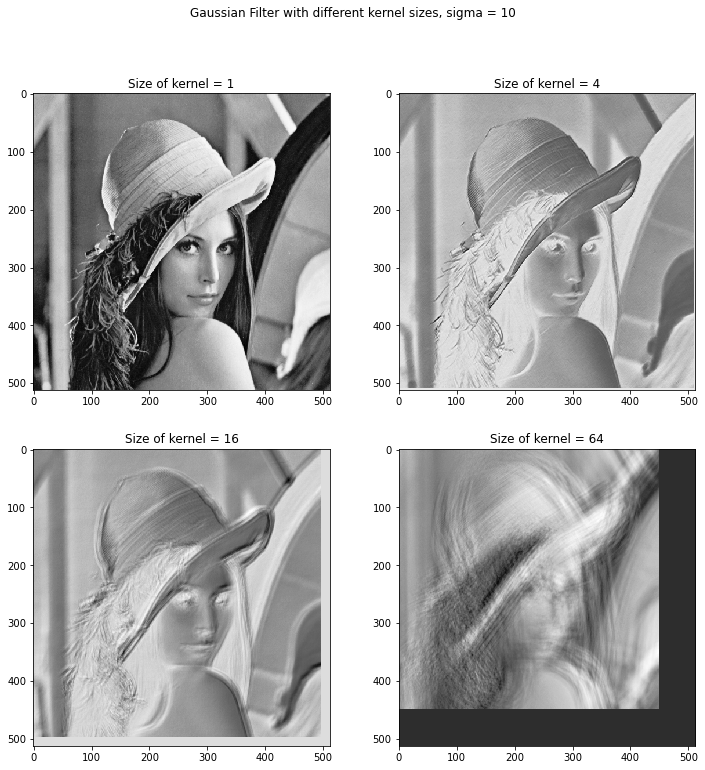

In [9]:
# the bigger the size of the kernel, the more blury and all-grey the image gets
fig, axes = plt.subplots(2, 2)

for i in range(4):
    con_matr = gaus_matr(4**i, 10)
    fglenna = convolution(l, con_matr)
    ax = axes[i//2, i%2]    
    ax.imshow(fglenna,cmap='Greys_r',interpolation='none')
    ax.set_title("Size of kernel = {}".format(4**i))
fig.suptitle('Gaussian Filter with different kernel sizes, sigma = 10');

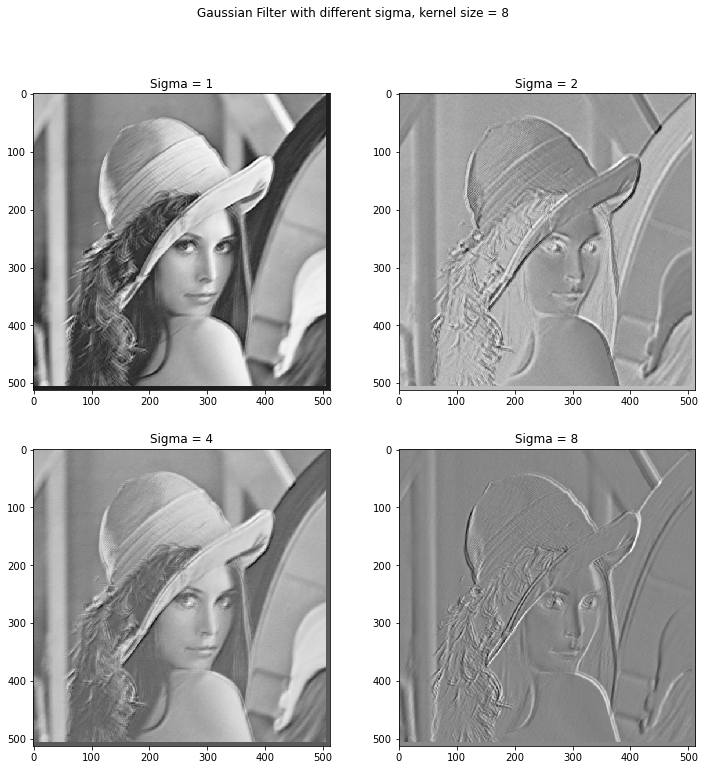

In [10]:
# the bigger the size of the kernel, the more blury and all-grey the image gets
fig, axes = plt.subplots(2, 2)

for i in range(4):
    con_matr = gaus_matr(8, 2**i)
    fglenna = convolution(l, con_matr)
    ax = axes[i//2, i%2]    
    ax.imshow(fglenna,cmap='Greys_r',interpolation='none')
    ax.set_title("Sigma = {}".format(2**i))
fig.suptitle('Gaussian Filter with different sigma, kernel size = 8');

## Second attempt with skimage functions

### Influence of Sigma

In our second attempt, we used the skimage functions to see how a proper implementation of the gaussian function looks like. Clearly, the professional packages creates a very advanced smoothing while preserving all the colors. Also here, we can see how the amount of blur gets bigger as we increase our sigma due to that more and more datapoints are taken into the new image datapoint.

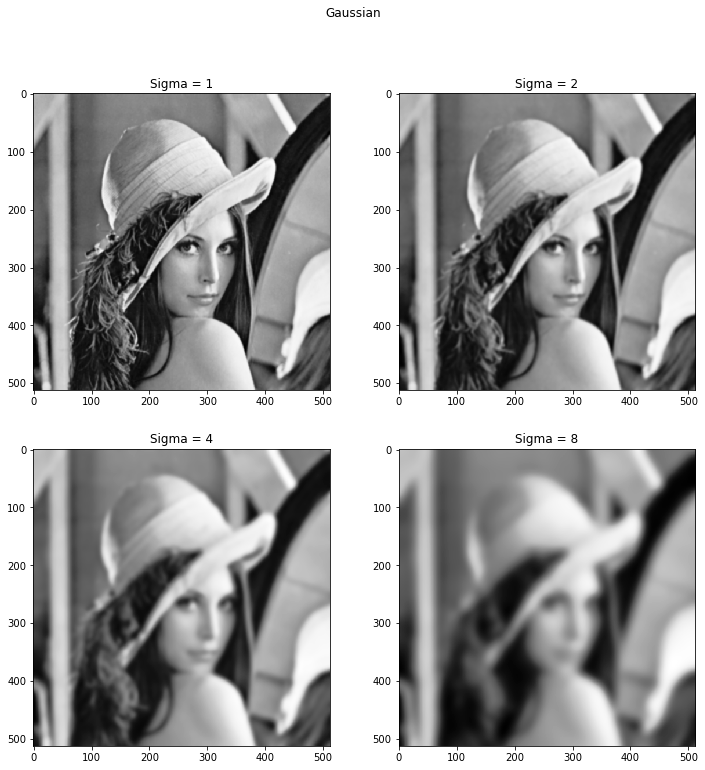

In [17]:
fig, axes = plt.subplots(2, 2)

for i in range(4):
    fglenna = gaussian(l, sigma=2**(i))
    ax = axes[i//2, i%2]    
    ax.imshow(fglenna,cmap='Greys_r',interpolation='none')
    ax.set_title("Sigma = {}".format(2**(i)))
fig.suptitle('Gaussian');

### Size of image

Another interesting feature of the filtering is the size of the initial image. The sigma (and also the kernel size) are always to be computed in dependence of the shape of the image. Below, we resclaed our initial image by the factor for resulting in an image of shape (128, 128) instead of (512, 512) and applied the same gaussian filter with the same different sigmas. We can see that the effect of the filtering is much more extreme (to be specific: 4 times as extreme) as the function now convolutes the same amount of pixels. But with a lower resolution this is a way bigger part of the total image.

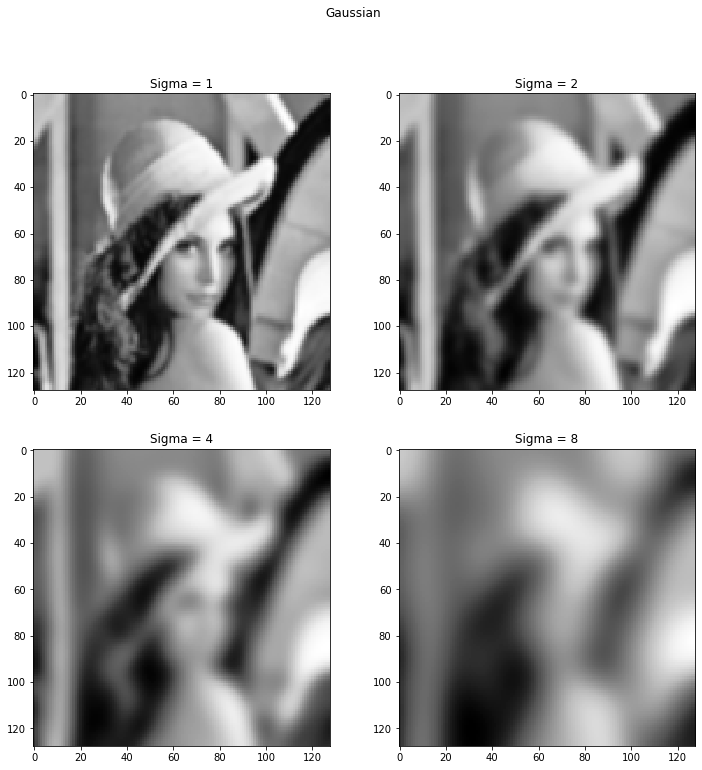

In [18]:
low_res = cv2.resize(l, dsize=(128, 128), interpolation=None)
fig, axes = plt.subplots(2, 2)

for i in range(4):
    fglenna = gaussian(low_res, sigma=2**(i))
    ax = axes[i//2, i%2]    
    ax.imshow(fglenna,cmap='Greys_r',interpolation='none')
    ax.set_title("Sigma = {}".format(2**(i)))
fig.suptitle('Gaussian');

# Gaussian magnitude filtering

For the Gaussian Magnitude filtering we applied the methods of skiamge again. As the above researched Gaussian filtering, we can see a difference in the blur as bigger as sigma gets. In contrast to the Gaussian filtering, we see here the edges in the picture. That is, the derivative of the image values, so the local changes.

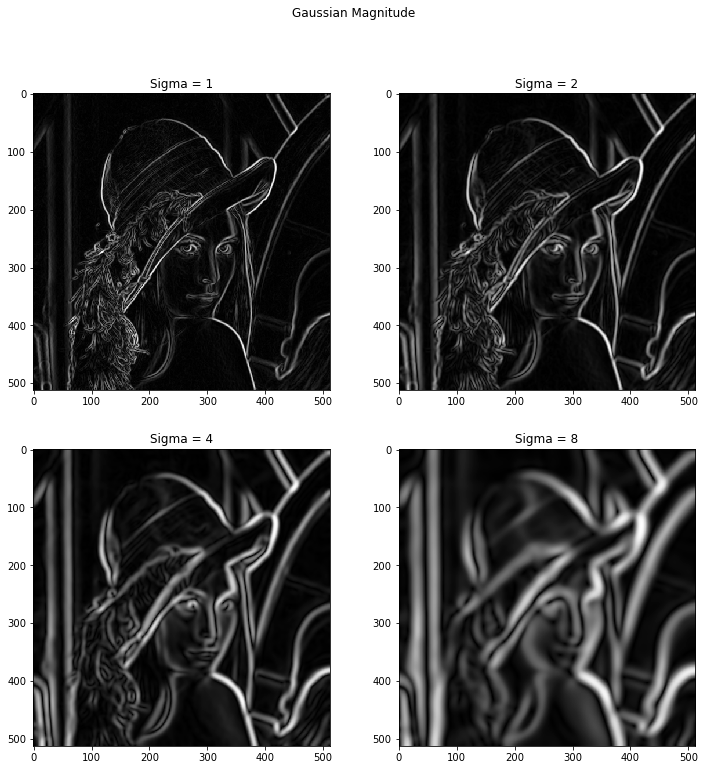

In [11]:
fig, axes = plt.subplots(2, 2)

for i in range(4):
    fglenna = gaussian_gradient_magnitude(l, sigma=2**(i))
    ax = axes[i//2, i%2]    
    ax.imshow(fglenna,cmap='Greys_r',interpolation='none')
    ax.set_title("Sigma = {}".format(2**(i)))
fig.suptitle('Gaussian Magnitude');

Our attempt of applying first the Gaussian filtering and afterwards the Gaussian Gradient Magnitude doesn't show any different results, as you can see below. One reason for that could be, that the skiamge function already includes a Gaussian smoothing in its GGM function.

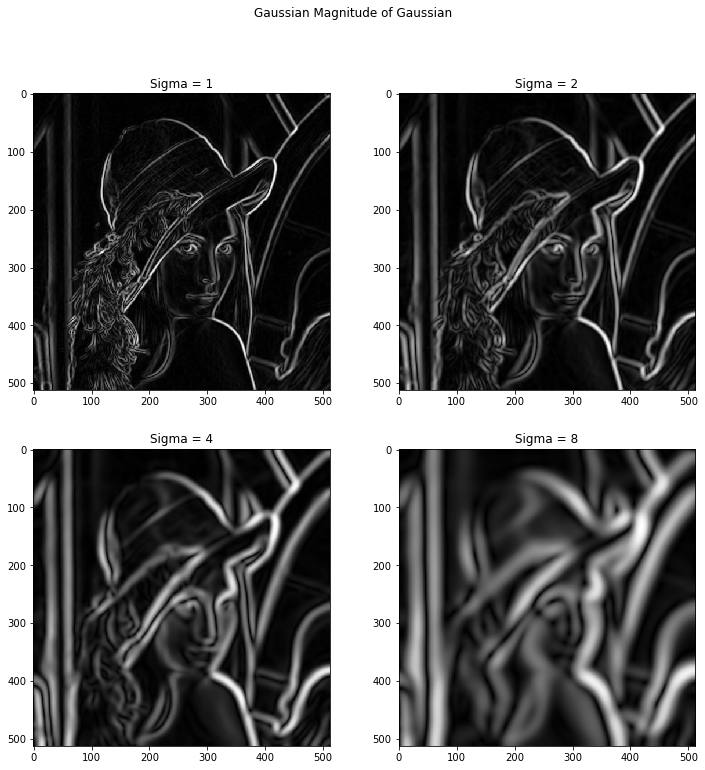

In [12]:
fig, axes = plt.subplots(2, 2)

for i in range(4):
    fglenna = gaussian_gradient_magnitude(gaussian(l, sigma=2**(i)), sigma=2**(i))
    ax = axes[i//2, i%2]    
    ax.imshow(fglenna,cmap='Greys_r',interpolation='none')
    ax.set_title("Sigma = {}".format(2**(i)))
fig.suptitle('Gaussian Magnitude of Gaussian');

However, if we compute the GGM of the GGM, we can see a result, that shows the derivative of the derivative. So this means, the black parts sourrounded by white parts of the images below show where in the preceding computation of the GGM there was an edge detected or in other words, where the values for the image changed.

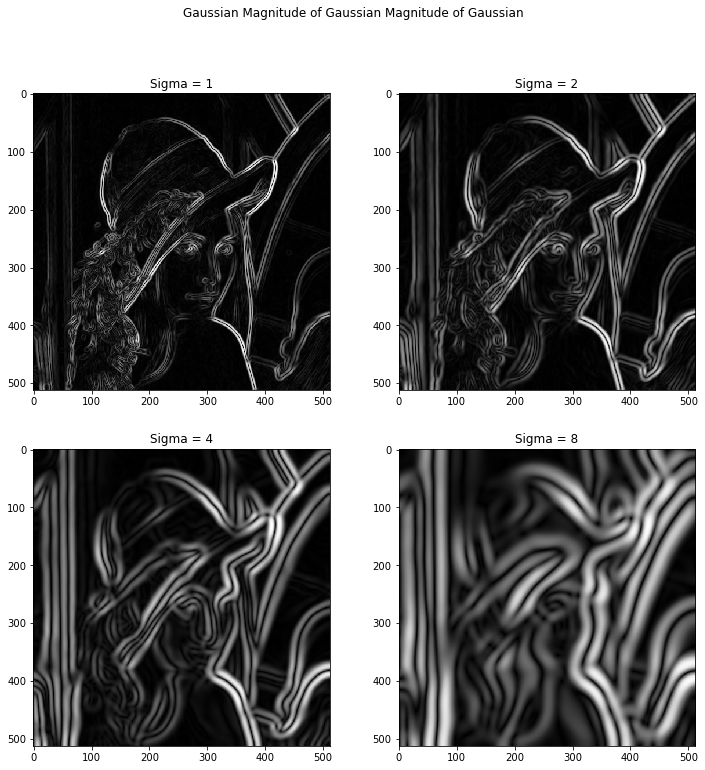

In [13]:
fig, axes = plt.subplots(2, 2)

for i in range(4):
    fglenna = gaussian_gradient_magnitude(gaussian_gradient_magnitude(gaussian(l, sigma=2**(i)), sigma=2**(i)), sigma=2**(i))
    ax = axes[i//2, i%2]    
    ax.imshow(fglenna,cmap='Greys_r',interpolation='none')
    ax.set_title("Sigma = {}".format(2**(i)))
fig.suptitle('Gaussian Magnitude of Gaussian Magnitude of Gaussian');

The same is true for when we apply the function three times, where now every edge splits up again in two edges resulting in an even more psychadelic picture.

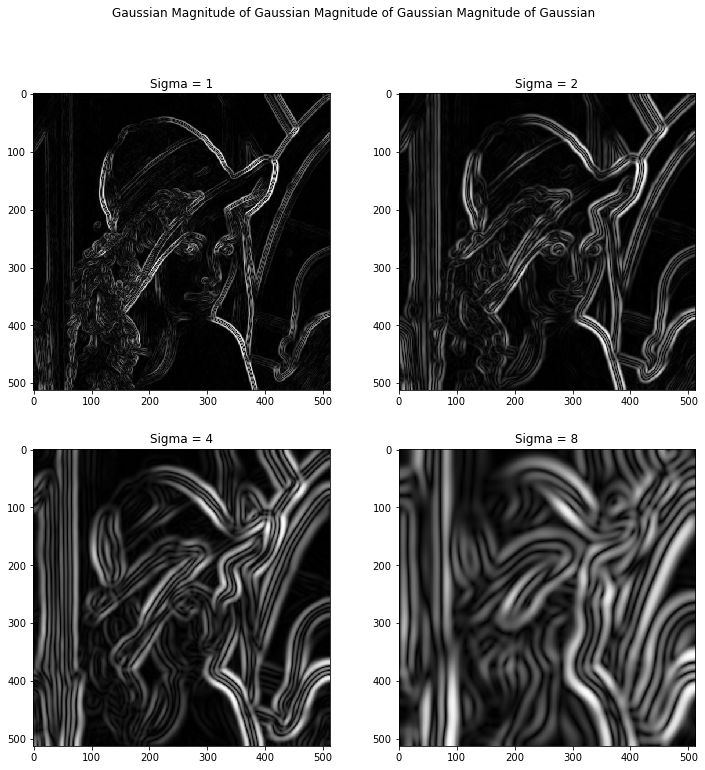

In [14]:
fig, axes = plt.subplots(2, 2)

for i in range(4):
    fglenna = gaussian_gradient_magnitude(gaussian_gradient_magnitude(gaussian_gradient_magnitude(gaussian(l, sigma=2**(i)), sigma=2**(i), mode='reflect'), sigma=2**(i), mode='reflect'), sigma=2**(i), mode='reflect')
    ax = axes[i//2, i%2]    
    ax.imshow(fglenna,cmap='Greys_r',interpolation='none')
    ax.set_title("Sigma = {}".format(2**(i)))
fig.suptitle('Gaussian Magnitude of Gaussian Magnitude of Gaussian Magnitude of Gaussian');